Load in all the necessary libraries and the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

exp = pd.read_csv("https://richardson.byu.edu/220/student_expenses.csv")
exp

,Gender,Age,Study_year,Scholarship,Transporting,expenses
0,Female,21,2,No,No,150
1,Male,25,3,No,Motorcycle,220
2,Male,23,2,Yes,No,180
3,Male,19,3,No,Motorcycle,200
4,Female,19,2,No,Motorcycle,300
...,...,...,...,...,...,...
93,Male,19,3,No,Motorcycle,200
94,Female,19,2,No,Motorcycle,300
95,Male,22,3,No,Car,150
96,Female,21,2,Yes,No,200


Fit and plot a regression tree.

[Text(0.475, 0.9166666666666666, 'Transporting_No <= 0.5\nsquared_error = 3640.952\nsamples = 98\nvalue = 215.612'),
 Text(0.22857142857142856, 0.75, 'Transporting_Motorcycle <= 0.5\nsquared_error = 3900.428\nsamples = 63\nvalue = 233.016'),
 Text(0.14285714285714285, 0.5833333333333334, 'Age <= 22.5\nsquared_error = 3937.374\nsamples = 33\nvalue = 256.667'),
 Text(0.11428571428571428, 0.4166666666666667, 'Age <= 21.5\nsquared_error = 3779.688\nsamples = 32\nvalue = 253.75'),
 Text(0.05714285714285714, 0.25, 'Study_year <= 2.5\nsquared_error = 2707.639\nsamples = 12\nvalue = 239.167'),
 Text(0.02857142857142857, 0.08333333333333333, 'squared_error = 555.556\nsamples = 9\nvalue = 266.667'),
 Text(0.08571428571428572, 0.08333333333333333, 'squared_error = 88.889\nsamples = 3\nvalue = 156.667'),
 Text(0.17142857142857143, 0.25, 'Gender_Male  <= 0.5\nsquared_error = 4218.75\nsamples = 20\nvalue = 262.5'),
 Text(0.14285714285714285, 0.08333333333333333, 'squared_error = 2040.816\nsamples = 

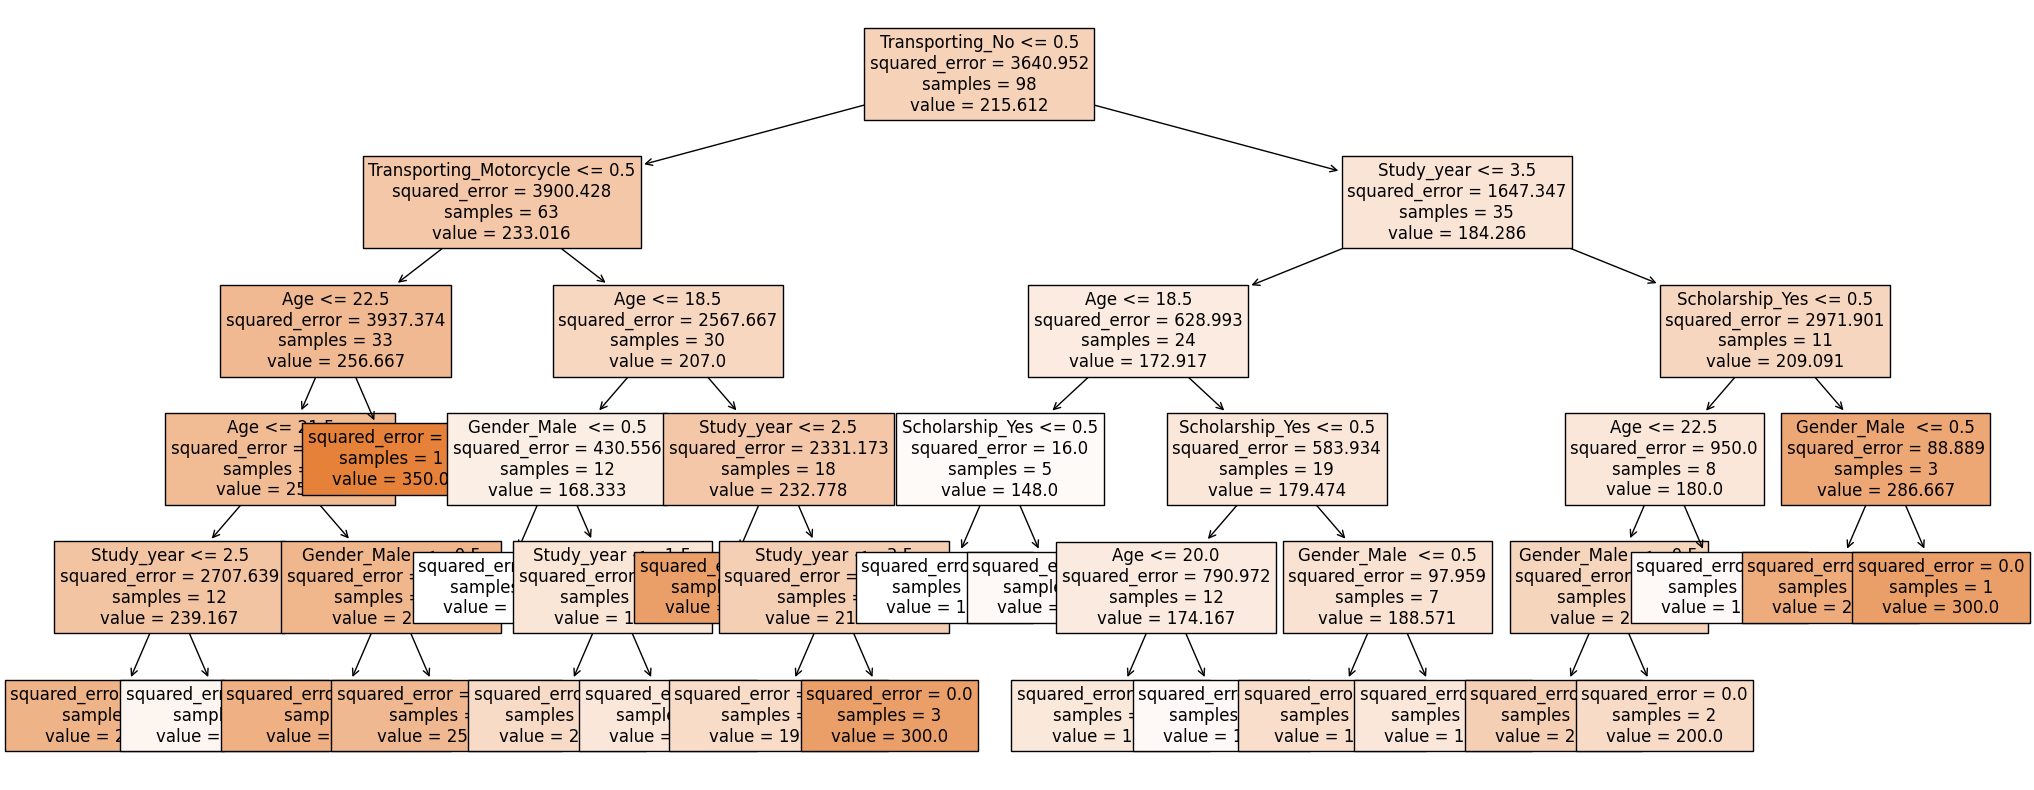

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

predictors = exp[["Age","Study_year","Gender","Scholarship","Transporting"]]
X = pd.get_dummies(predictors,drop_first = True)
y = exp["expenses"]
tree_prep = DecisionTreeRegressor(max_depth = 5)
mod_tree = tree_prep.fit(X,y)

plt.figure(figsize = (25,10))
tree.plot_tree(mod_tree, feature_names=X.columns, filled = True,fontsize = 12)

What are the feature importances for the tree?

In [3]:
mod_tree.feature_importances_

array([0.25225777, 0.05816585, 0.        , 0.1462882 , 0.22843254,
       0.31485563])

In [4]:
dict(zip(X.columns,mod_tree.feature_importances_))

{'Age': 0.2522577748900568,
 'Study_year': 0.05816584879742742,
 'Gender_Male ': 0.0,
 'Scholarship_Yes': 0.1462882018997144,
 'Transporting_Motorcycle': 0.22843254093159704,
 'Transporting_No': 0.3148556334812043}

Make a nice little figure for it!

<Axes: >

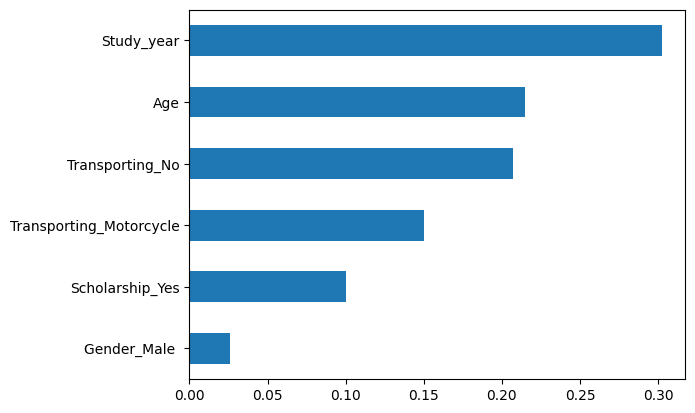

In [9]:
pd.Series(mod_tree.feature_importances_, index=X.columns).sort_values().plot(kind='barh')